## Building A Credit Card Approval Predictor with Machine Learning

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Credit_card.csv')
labels = pd.read_csv('Credit_card_label.csv')

In [3]:
data.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [5]:
data.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [6]:
# Where 0 is approved and 1 is rejected.. 
labels.head(10)

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
5,5009753,1
6,5009754,1
7,5009894,1
8,5010864,1
9,5010868,1


In [7]:
# Merge the dataframe.
dataframe = data.merge(labels, on = "Ind_ID", how = "left")

In [8]:
dataframe.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [11]:
dataframe.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [12]:
dataframe.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [13]:
## Removing NA values
dataframe.drop(columns = ("Type_Occupation"),inplace = True)


In [14]:
dataframe.isna().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count    22
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

In [15]:
# Now we drop the additional na values removing annual income and birthday counts

dataframe.dropna(inplace = True)

In [16]:
dataframe.isna().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [17]:
dataframe.duplicated().sum()

0

### Calculate Gender Income

In [18]:
gender_income = dataframe.groupby("GENDER")["Annual_income"].mean()
gender_income

GENDER
F    172391.840021
M    222485.245902
Name: Annual_income, dtype: float64

In [19]:
gender_income.sort_values(ascending = False)

GENDER
M    222485.245902
F    172391.840021
Name: Annual_income, dtype: float64

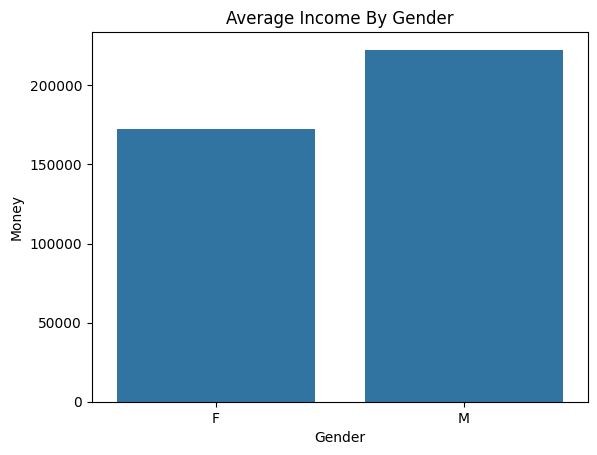

In [20]:
# Plot the average income by gender
sns.barplot(x = gender_income.index,y = gender_income.values)
plt.title("Average Income By Gender")
plt.xlabel("Gender")
plt.ylabel("Money")
plt.show()

In [21]:
label_counts = dataframe["label"].value_counts()
label_counts

label
0    1336
1     160
Name: count, dtype: int64

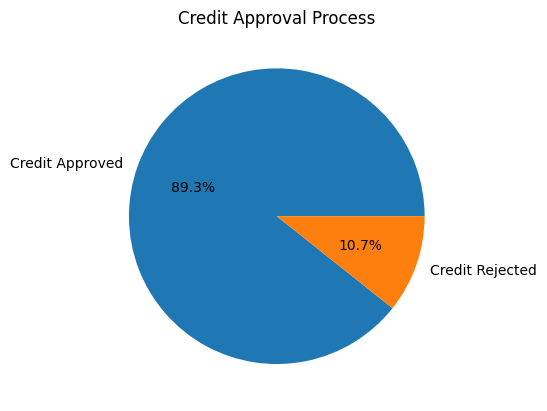

In [22]:
# Create pie chart
plt.pie(label_counts, labels = ["Credit Approved", "Credit Rejected"], autopct = "%1.1f%%")
plt.title("Credit Approval Process")
plt.show()

In [23]:
## Group by Type Income and caculate the mean of annual income
dataframe.groupby("Type_Income")["Annual_income"].mean()

Type_Income
Commercial associate    233880.169972
Pensioner               154964.866795
State servant           210130.434783
Working                 180154.579974
Name: Annual_income, dtype: float64

In [24]:
dataframe.groupby("Marital_status")["Employed_days"].max()

Marital_status
Civil marriage          365243
Married                 365243
Separated               365243
Single / not married    365243
Widow                   365243
Name: Employed_days, dtype: int64

In [25]:
dataframe.groupby("Housing_type")["Family_Members"].sum()

Housing_type
Co-op apartment           5
House / apartment      2900
Municipal apartment      92
Office apartment         21
Rented apartment         46
With parents            175
Name: Family_Members, dtype: int64

In [26]:
# Nonsense values undo the negative values
dataframe.groupby("GENDER")["Birthday_count"].min() * -1

GENDER
F    24946.0
M    24662.0
Name: Birthday_count, dtype: float64

In [27]:
dataframe.groupby("Propert_Owner")["Annual_income"].mean()

Propert_Owner
N    183343.352601
Y    194722.899181
Name: Annual_income, dtype: float64

In [28]:
# This is a binary values
dataframe.groupby("EDUCATION")["Mobile_phone"].max()

EDUCATION
Academic degree                  1
Higher education                 1
Incomplete higher                1
Lower secondary                  1
Secondary / secondary special    1
Name: Mobile_phone, dtype: int64

In [29]:
dataframe.groupby("CHILDREN")["Annual_income"].sum()

CHILDREN
0     191703172.5
1      64218600.0
2      26226900.0
3       2845800.0
4        180000.0
14       225000.0
Name: Annual_income, dtype: float64

#### Create 3 to 4 plots (Data Visulization)

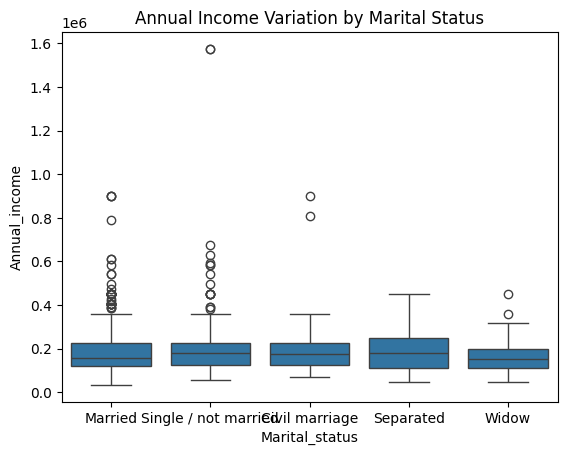

In [30]:
sns.boxplot(x = "Marital_status", y = "Annual_income",data = dataframe)
plt.title("Annual Income Variation by Marital Status")
plt.show()

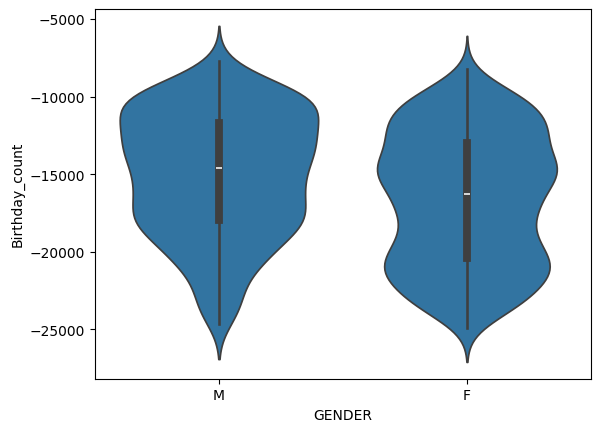

In [31]:
sns.violinplot(x = "GENDER",y = "Birthday_count",data = dataframe)
plt.show()

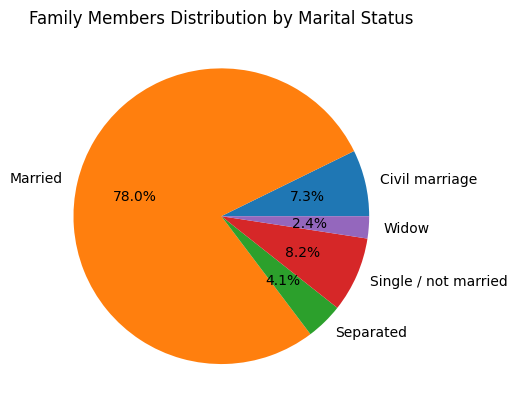

In [32]:
data.groupby("Marital_status")["Family_Members"].sum().plot(kind = "pie",autopct = "%1.1f%%" )
plt.title("Family Members Distribution by Marital Status")
plt.ylabel(" ")
plt.show()

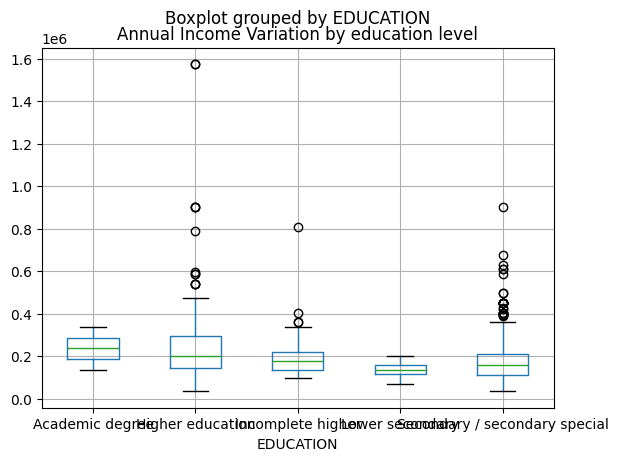

In [33]:
dataframe.boxplot(column = "Annual_income", by = "EDUCATION")
plt.title("Annual Income Variation by education level")
plt.show()


In [34]:
dataframe.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'],
      dtype='object')

In [35]:
data_features = dataframe[['Car_Owner', 'Propert_Owner','Annual_income','EDUCATION','label']]

In [36]:
data_features

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,Y,Y,180000.0,Higher education,1
1,Y,N,315000.0,Higher education,1
4,Y,N,315000.0,Higher education,1
6,Y,N,315000.0,Higher education,1
7,N,N,180000.0,Secondary / secondary special,1
...,...,...,...,...,...
1542,Y,N,360000.0,Secondary / secondary special,0
1544,N,N,225000.0,Incomplete higher,0
1545,Y,Y,180000.0,Higher education,0
1546,Y,N,270000.0,Secondary / secondary special,0


In [37]:
# We are going to encode categorical values..

from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [38]:
# Do it for Car_Owner and Propert_Owner
data_features["Car_Owner"] = labelencoder.fit_transform(data_features["Car_Owner"])
data_features["Propert_Owner"] = labelencoder.fit_transform(data_features["Propert_Owner"])
data_features['EDUCATION'] = labelencoder.fit_transform(data_features["EDUCATION"])

C:\Users\Al Haque\AppData\Local\Temp\ipykernel_11000\2160012626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features["Car_Owner"] = labelencoder.fit_transform(data_features["Car_Owner"])
C:\Users\Al Haque\AppData\Local\Temp\ipykernel_11000\2160012626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features["Propert_Owner"] = labelencoder.fit_transform(data_features["Propert_Owner"])
C:\Users\Al Haque\AppData\Local\Temp\ipykernel_11000\2160012626.py:4: SettingWithCopyWarning: 
A value i

In [39]:
data_features

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,1,1,180000.0,1,1
1,1,0,315000.0,1,1
4,1,0,315000.0,1,1
6,1,0,315000.0,1,1
7,0,0,180000.0,4,1
...,...,...,...,...,...
1542,1,0,360000.0,4,0
1544,0,0,225000.0,2,0
1545,1,1,180000.0,1,0
1546,1,0,270000.0,4,0


In [40]:
# If we scale before train/test then it will cause data-leakage..

X = data_features.iloc[:,:-1]

In [43]:
X

,Car_Owner,Propert_Owner,Annual_income,EDUCATION
0,1,1,180000.0,1
1,1,0,315000.0,1
4,1,0,315000.0,1
6,1,0,315000.0,1
7,0,0,180000.0,4
...,...,...,...,...
1542,1,0,360000.0,4
1544,0,0,225000.0,2
1545,1,1,180000.0,1
1546,1,0,270000.0,4


In [41]:
y = data_features.iloc[:,-1]

In [44]:
y

0       1
1       1
4       1
6       1
7       1
       ..
1542    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1496, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [45]:
# Now we scale our data..
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [46]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,predictions)))
    

In [47]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [48]:
log_predictions = log_model.predict(scaled_X_test)

In [49]:
modelperformance(log_predictions)

Accuracy score on model is 0.89


In [50]:
# Implement gridsearch to help us with hyperparameter tuning..
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors": [3,5,7,8,9,11],
              "weights" : ["uniform","distance"],
              "algorithm": ["auto","kd_tree"]}

# Grid Search cross-validation 5 or 10
gridKn = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 5)


In [52]:
gridKn.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [3, 5, 7, 8, 9, 11],
                         'weights': ['uniform', 'distance']})

In [54]:
# best_params_ shows the best parameters
gridKn.best_params_

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}

In [56]:
# 
knpreds = gridKn.predict(scaled_X_test)

In [57]:
modelperformance(knpreds)

Accuracy score on model is 0.89


#### Train A support vector classifier 

In [59]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svr = {"C" : [0.01,0.1,0.5,1],
                  "kernel": ["linear","rbf","poly"]}
gridsvr = GridSearchCV(svm,param_grid_svr)

In [60]:
gridsvr.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [61]:
pred_svc = gridsvr.predict(scaled_X_test)
modelperformance(pred_svc)

Accuracy score on model is 0.89


#### Build A decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "criterion": ["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None,10,20,30,40,50],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,3,4]
}
grid_search_tree = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = param_grid)

In [66]:
grid_search_tree.fit(scaled_X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [67]:
grid_search_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [68]:
preds = grid_search_tree.predict(scaled_X_test)

In [69]:
modelperformance(preds)

Accuracy score on model is 0.8633333333333333


#### Build A random forest model now..

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
n_estimators = [32,64,128,256]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [71]:
param_grid_rfc = {
    'n_estimators': n_estimators,
    "max_features" : max_features,
    "bootstrap": bootstrap,
    "oob_score": oob_score
}

In [72]:
grid_rfc = GridSearchCV(rfc_model,param_grid_rfc)

In [73]:
grid_rfc.fit(scaled_X_train,y_train)

C:\Users\Al Haque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Al Haque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Al Haque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [74]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 128, 'oob_score': True}

In [75]:
predsrfc = grid_rfc.predict(scaled_X_test)

In [76]:
modelperformance(predsrfc)

Accuracy score on model is 0.8733333333333333


#### Train a ADABOOST model now

In [78]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_param_grid = {
    "n_estimators" : [50,150,100,200],
    "learning_rate": [0.01,0.1,1,10]
}

ada_grid_search = GridSearchCV(ada_classifier,ada_param_grid,cv = 2)

In [80]:
ada_grid_search.fit(scaled_X_train,y_train)

C:\Users\Al Haque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Al Haque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Al Haque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circ

GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 150, 100, 200]})

In [81]:
adapred = ada_grid_search.predict(scaled_X_test)

In [82]:
modelperformance(adapred)

Accuracy score on model is 0.89


#### Train The XGBoost Model..

In [92]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_param_grid = {
    "n_estimators" : [20,40,60,80,100,500],
    "learning_rate" : [0.01,0.1,0.2,0.3,0.5],
    "max_depth": [3,4,5,7]
}

In [93]:
xgb_grid_search = GridSearchCV(xgb_classifier,xgb_param_grid,cv = 5)

In [94]:
xgb_grid_search.fit(scaled_X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 7],
                         'n_estimators': [20, 40, 60, 80, 100, 500]})

In [95]:
xgbpred = xgb_grid_search.predict(scaled_X_test)

In [96]:
xgb_grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 20}

In [98]:
modelperformance(xgbpred)

Accuracy score on model is 0.89


##### End Seems Xgboost still has the same performance as before